In [1]:
import pyspark
from pyspark.sql import SparkSession
import matplotlib.pyplot as plt
import numpy as np

In [2]:
spark = SparkSession.builder.appName("abc").master("spark://spark-master:7077").getOrCreate()

In [3]:
spark

In [4]:
from pyspark.sql.types import StructType,StructField, StringType, DoubleType

schema = StructType([
      StructField("sbd",StringType(),True),
      StructField("toan",DoubleType(),True),
      StructField("ngu_van",DoubleType(),True),
      StructField("ngoai_ngu",DoubleType(),True),
      StructField("vat_li",DoubleType(),True),
      StructField("hoa_hoc",DoubleType(),True),
      StructField("sinh_hoc",DoubleType(),True),
      StructField("lich_su",DoubleType(),True),
      StructField("dia_li",DoubleType(),True),
      StructField("gdcd",DoubleType(),True),
  ])

In [5]:
data_frame = spark.read.schema(schema) \
    .csv("hdfs://namenode:9000/data/*.csv", header=False)
data_frame.printSchema()
data_frame.show()

root
 |-- sbd: string (nullable = true)
 |-- toan: double (nullable = true)
 |-- ngu_van: double (nullable = true)
 |-- ngoai_ngu: double (nullable = true)
 |-- vat_li: double (nullable = true)
 |-- hoa_hoc: double (nullable = true)
 |-- sinh_hoc: double (nullable = true)
 |-- lich_su: double (nullable = true)
 |-- dia_li: double (nullable = true)
 |-- gdcd: double (nullable = true)

+--------+----+-------+---------+------+-------+--------+-------+------+----+
|     sbd|toan|ngu_van|ngoai_ngu|vat_li|hoa_hoc|sinh_hoc|lich_su|dia_li|gdcd|
+--------+----+-------+---------+------+-------+--------+-------+------+----+
|01000001| 3.6|    5.0|      4.0|  null|   null|    null|   2.75|   6.0|8.75|
|01000002| 8.4|   6.75|      7.6|  null|   null|    null|    8.5|   7.5|8.25|
|01000003| 5.8|    7.5|      5.0|  null|   null|    null|   7.25|   5.5|8.75|
|01000004| 7.4|    7.5|      8.6|  null|   null|    null|    7.5|   6.5| 7.5|
|01000005| 7.2|    8.5|      9.0|  null|   null|    null|    8.0|  

In [6]:
data_frame.createOrReplaceTempView("student")

In [24]:
def round(x):
    if (x == (int)(x)): return x
    else :
        tmp = x - (int)(x)
        if tmp <= 0.5: return (int)(x) + 0.5
        else: return (int)(x) + 1

In [7]:
def count_thi_xa_hoi():
    sql = spark.sql("select count(*) from student where vat_li is null and hoa_hoc is null and sinh_hoc is null")
    sql.show()

In [8]:
def count_10(subject):
    spark.sql("select count("+ subject +") \
                      from student where (" + subject + " ==10 )").show()

In [75]:
plt.rcParams["figure.figsize"] = [10.00, 3.50]
plt.rcParams["figure.autolayout"] = True

In [102]:
def subject_point_spectrum_by_province(subject, province = ""):
    global data_frame
    subject_mapping = {
        "toan" : 1,
        "ngu_van" : 2,
        "ngoai_ngu" : 3,
        "vat_li" : 4,
        "hoa_hoc" : 5,
        "sinh_hoc" : 6,
        "lich_su" : 7,
        "dia_li" : 8,
        "gdcd": 9
    }

    scores = data_frame.rdd.filter(lambda x: x[0].startswith(province) if province != "" else True).filter(lambda x: x[subject_mapping[subject]] is not None).map(lambda x:x[subject_mapping[subject]]).collect()
    count_scores = []
    scores_label = []
    
    k = 5 if(subject == "toan" or subject == "ngoai_ngu") else 4
    
    for i in range(k * 10 + 1):
        count_scores.append(0)
        scores_label.append(i/k)
    for i in range(len(scores)):
        count_scores[int(k * scores[i])] += 1
 
    fig, ax = plt.subplots()
    ax.set_xticks(scores_label)
    ax.set_xticklabels(scores_label, rotation=90)
    ax.bar(scores_label, count_scores, width=0.1)
    print("Phổ điểm môn " + subject)
    plt.show() 
    print("\nMean of subject: ", np.mean(scores)) 

Phổ điểm môn ngoai_ngu


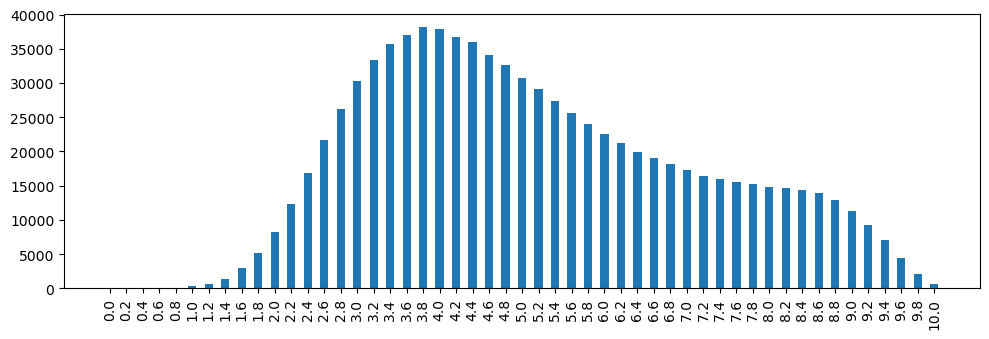


Mean of subject:  5.157686401128404


In [106]:
subject_point_spectrum_by_province("ngoai_ngu")

In [ ]:
count_10("toan")

+-----------+
|count(toan)|
+-----------+
|         35|
+-----------+

